Saving fulfilment_center_info.csv to fulfilment_center_info.csv

✅ Dataset 'fulfilment_center_info.csv' uploaded successfully.

📄 First 5 rows of the dataset:


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6



🔍 Available columns: ['center_id', 'city_code', 'region_code', 'center_type', 'op_area']

🎯 Enter the name of the target (label) column (e.g., 'category'): region_code

📊 Accuracy Results:
🌲 Random Forest Accuracy: 33.33%
🧠 Naive Bayes Accuracy: 16.67%

🌲 Random Forest Classification Report:
              precision    recall  f1-score   support

          34       0.43      0.50      0.46         6
          56       0.29      0.67      0.40         6
          77       0.00      0.00      0.00         8
          85       0.50      0.33      0.40         3
          93       0.00      0.00      0.00         1

    accuracy                           0.33        24
   macro avg       0.24      0.30      0.25        24
weighted avg       0.24      0.33      0.27        24

🌲 Random Forest Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


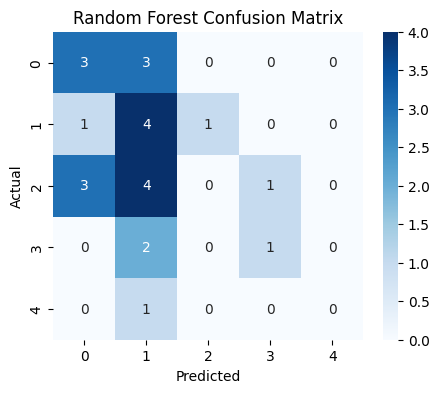


🧠 Naive Bayes Classification Report:
              precision    recall  f1-score   support

          34       0.00      0.00      0.00         6
          56       0.31      0.67      0.42         6
          77       0.00      0.00      0.00         8
          85       0.00      0.00      0.00         3
          93       0.00      0.00      0.00         1

    accuracy                           0.17        24
   macro avg       0.06      0.13      0.08        24
weighted avg       0.08      0.17      0.11        24

🧠 Naive Bayes Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


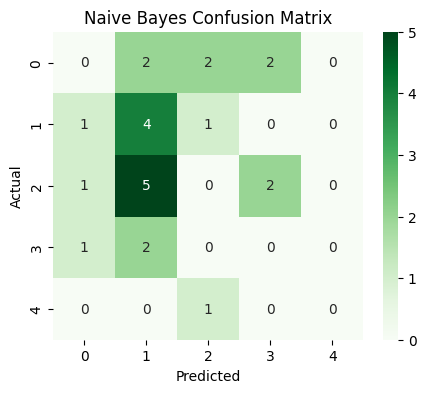

In [ ]:
# STEP 1: Upload your dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
from io import StringIO

# STEP 2: Load CSV file
for file_name in uploaded.keys():
    df = pd.read_csv(StringIO(uploaded[file_name].decode('utf-8')))
    print(f"\n✅ Dataset '{file_name}' uploaded successfully.\n")
    break  # Only use the first file

# Show a preview
print("📄 First 5 rows of the dataset:")
display(df.head())

# STEP 3: Select the target column
print("\n🔍 Available columns:", df.columns.tolist())
target_col = input("\n🎯 Enter the name of the target (label) column (e.g., 'category'): ")

# Split into features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Handle categorical data (e.g., turning text into numbers)
X = pd.get_dummies(X)  # This converts categorical columns to numeric
if y.dtype == 'object':
    y = pd.factorize(y)[0]  # Convert categorical labels to numeric values

# STEP 4: Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# STEP 5: Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# STEP 6: Train Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# STEP 7: Evaluate Models (Accuracy, Classification Report, Confusion Matrix)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores
rf_acc = accuracy_score(y_test, rf_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# Print accuracy results
print("\n📊 Accuracy Results:")
print(f"🌲 Random Forest Accuracy: {rf_acc:.2%}")
print(f"🧠 Naive Bayes Accuracy: {nb_acc:.2%}")

# Classification Report for Random Forest
print("\n🌲 Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix for Random Forest
print("🌲 Random Forest Confusion Matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for Naive Bayes
print("\n🧠 Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

# Confusion Matrix for Naive Bayes
print("🧠 Naive Bayes Confusion Matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()